### Environment

In [219]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [220]:
# Grid environment
grid_size = 10
grid = np.zeros((grid_size, grid_size))

In [221]:
# Random start and goal points
start = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
goal = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
while goal == start:
    goal = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))

In [222]:
# Random obstacles
num_obstacles = 20  
obstacles = set()
while len(obstacles) < num_obstacles:
    obstacle = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
    if obstacle != start and obstacle != goal:
        obstacles.add(obstacle)

In [223]:
# obstacles (-1), start (1), and goal (2)
for obs in obstacles:
    grid[obs] = -1
grid[start] = 1
grid[goal] = 2

In [224]:
print("Grid Layout (1=Start, 2=Goal, -1=Obstacle):")
print(grid)

Grid Layout (1=Start, 2=Goal, -1=Obstacle):
[[ 0.  0.  0.  2. -1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1. -1.]
 [ 0.  0. -1.  0.  1.  0.  0.  0.  0. -1.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0. -1.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0. -1.  0. -1.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1. -1.]
 [ 0.  0.  0.  0. -1.  0.  0. -1.  0. -1.]]


### MDP Approach

In [225]:
actions = ['up', 'down', 'left', 'right']
gamma = 0.9  # Discount factor
state = (0,0)

In [226]:
# Value and policy tables
values = np.random.rand(grid_size, grid_size)  
policy = np.random.randint(0, 4, (grid_size, grid_size))  # Random actions 

In [227]:
# Define a function to take a step in the environment
def step(state, action):
    x, y = state
    if action == 'up':
        next_state = (max(0, x - 1), y)
    elif action == 'down':
        next_state = (min(grid_size - 1, x + 1), y)
    elif action == 'left':
        next_state = (x, max(0, y - 1))
    elif action == 'right':
        next_state = (x, min(grid_size - 1, y + 1))
    
    # Return the reward and check if next state is an obstacle or goal
    if next_state == goal:
        return next_state, 10  # Goal reward
    elif next_state in obstacles:
        return next_state, -10  # Obstacle penalty
    else:
        return next_state, -1  # Step penalty

In [228]:
# Value Iteration
def value_iteration():
    global values, policy,state
    rewards=[]
    while state!=goal:
        delta = 0
        # Evaluate actions
        action_values = []
        for i, action in enumerate(actions):
            next_state, reward = step(state, action)
            action_values.append(reward + gamma * values[next_state])

        # Best action and its value
        best_action_value = max(action_values)
        best_action = np.argmax(action_values)

        # Update the value and policy
        delta = max(delta, abs(best_action_value - values[state]))
        values[state] = best_action_value
        policy[state] = best_action
        state,reward=step(state,actions[best_action])
        rewards.append(reward)
    return rewards

In [229]:
reward_mdp=value_iteration()

### Q Learning

In [230]:
import random

# Q-learning parameters
alpha = 0.1  # Learning rate
epsilon = 0.1  # Exploration rate
q_table = np.zeros((grid_size, grid_size, len(actions)))

In [231]:
# Q-Learning function
def q_learning(episodes=500):
    global q_table
    rewards=[]
    for _ in range(episodes):
        state = start
        while state != goal:
            # Choose action based on epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                action_index = random.randint(0, len(actions) - 1)  # Explore
            else:
                action_index = np.argmax(q_table[state])  # Exploit
            
            # Take action and observe next state and reward
            action = actions[action_index]
            next_state, reward = step(state, action)
            rewards.append(reward)
            
            # Update Q-value
            best_next_action = np.argmax(q_table[next_state])
            q_table[state][action_index] += alpha * (reward + gamma * q_table[next_state][best_next_action] - q_table[state][action_index])
            
            # Move to next state
            state = next_state
        return rewards
reward_q=q_learning()

### Comparison of rewards over iterations

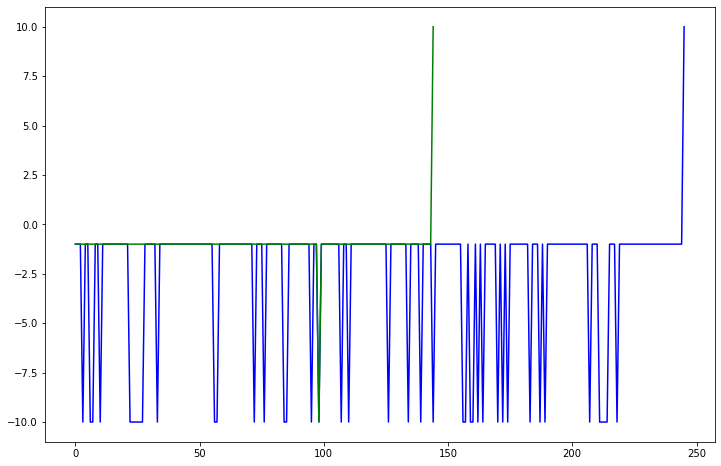

In [191]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(range(len(reward_q)),reward_q,c="b")
plt.plot(range(len(reward_mdp)),reward_mdp,c="g")

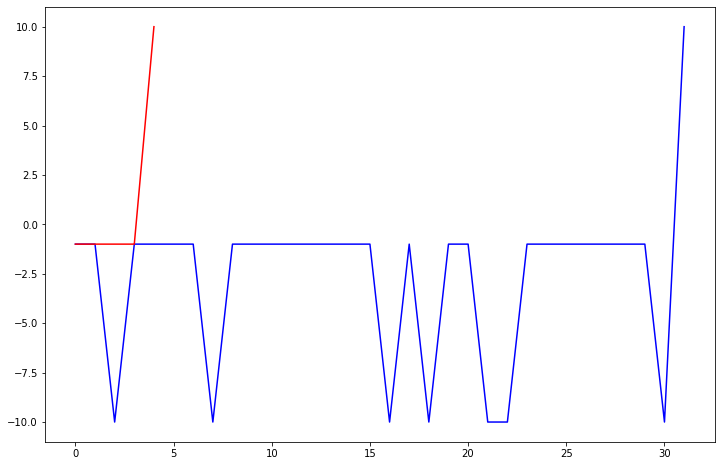

In [233]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(range(len(reward_q)),reward_q,c="b")
plt.plot(range(len(reward_mdp)),reward_mdp,c="r")